In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
import os

# Define class names (update this list with your actual class labels)
CLASS_NAMES = [
    'afritada', 'arroz_caldo', 'bagnet', 'balut', 'bibingka', 
    'bicol_express', 'bistek_tagalog', 'buco_pie', 'bulalo', 
    'cassava_cake', 'champorado', 'chicharon', 'chicken_adobo',
    'chicken_bistek', 'chicken_inasal', 'crispy_pata', 
    'filipino_spaghetti', 'ginataang_gulay', 'halo-halo',
    'kaldereta', 'kare-kare', 'kilawin', 'kinilaw', 'laing', 
    'leche_flan', 'lechon', 'lechon_kawali', 'liempo', 
    'longganisa', 'lumpia', 'pancit_guisado', 'pancit_palabok',
    'pandesal', 'pinakbet', 'pork_adobo', 'pork_barbecue',
    'pork_sisig', 'sinigang', 'taho', 'tapa', 'tinola', 
    'tocino', 'turon', 'ube_ice_cream', 'ube_milkshake'
]

# Load the trained model
model_path = r"C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\Filipino_Food_ResNet50_Final.h5"
if not os.path.exists(model_path):
    print(f"Model file not found: {model_path}")
else:
    print(f"Loading model from: {model_path}")
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")

# Define the directory containing test images
image_dir = r"C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image"

# Get list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process and predict for up to 10 images
num_images_to_predict = min(10, len(image_files))
for i, image_file in enumerate(image_files[:num_images_to_predict]):
    image_path = os.path.join(image_dir, image_file)
    print(f"\nProcessing image {i+1}/{num_images_to_predict}: {image_path}")
    
    # Open and preprocess the image
    try:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((224, 224))  # Resize to match model input size
        image_array = img_to_array(image)
        image_array = preprocess_input(np.expand_dims(image_array, axis=0))  # Apply same preprocessing as training

        # Make a prediction
        predictions = model.predict(image_array)
        predicted_class_index = np.argmax(predictions[0])  # Get index of the highest confidence
        confidence = float(predictions[0][predicted_class_index])  # Confidence score of the prediction

        # Retrieve class name
        class_name = CLASS_NAMES[predicted_class_index]

        # Print results
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted class name: {class_name}")
        print(f"Confidence: {confidence:.2f}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")


Loading model from: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\Filipino_Food_ResNet50_Final.h5


Model loaded successfully.

Processing image 1/10: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image\afritada.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: 0
Predicted class name: afritada
Confidence: 1.00

Processing image 2/10: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image\Arroz Caldo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted class index: 1
Predicted class name: arroz_caldo
Confidence: 1.00

Processing image 3/10: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image\champorado.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted class index: 10
Predicted class name: champorado
Confidence: 1.00

Processing image 4/10: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image\halo.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class index: 18
Predicted class name: halo-halo
Confidence: 0.81

Processing image 5/10: C:\Users\kimry\OneDrive\Desktop\D

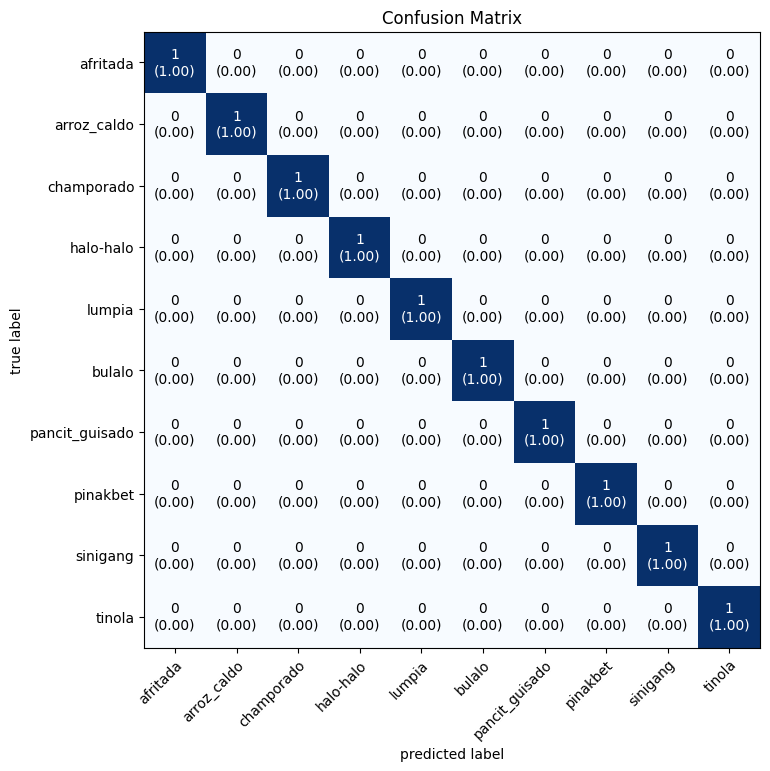

Test Accuracy: 100.00%


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Predicted class indices
predicted_labels = np.array([
    0,  # afritada
    1,  # arroz_caldo
    10, # champorado
    18, # halo-halo
    29, # lumpia
    8,  # bulalo
    30, # pancit_guisado
    33, # pinakbet
    37, # sinigang
    40  # tinola
])  

# True class indices
true_labels = np.array([
    0,  # afritada
    1,  # arroz_caldo
    10, # champorado
    18, # halo-halo
    29, # lumpia
    8,  # bulalo
    30, # pancit_guisado
    33, # pinakbet
    37, # sinigang
    40  # tinola
])  

# Class names (only include relevant ones)
class_names = [
    'afritada', 'arroz_caldo', 'champorado', 'halo-halo', 'lumpia',
    'bulalo', 'pancit_guisado', 'pinakbet', 'sinigang', 'tinola'
]

# Compute confusion matrix
cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8), 
                                show_normed=True, 
                                class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

# Print Test Accuracy
accuracy = (np.diagonal(cm).sum() / cm.sum()) * 100
print(f"Test Accuracy: {accuracy:.2f}%")
